 __________
<div style="color: green; font-weight: bold; font-size: 24px; white-space: nowrap; padding: 10px;">
    Insurance Claim Forecasting Using Vehicle Policy and Safety Data
</div>

___________

<div style="color: grey; font-weight: bold; font-size: 18px; white-space: nowrap;">
BUSINESS PROBLEM STATEMENT
</div>

DESIGN A PREDICTIVE SOLUTION TO ESTIMATE CLAIM PROBABILITY ON CAR INSURANCE POLICIES

<div style="color: grey; font-weight: bold; font-size: 18px; white-space: nowrap;">
OBJECTIVES
</div>

> 01. Identify key factors influencing claim frequency and severity over a six-month period.

> 02. Enhance risk assessment capabilities for insurance companies.

> 03. Assist in setting appropriate premiums for policyholders.

___________

<div style="color: #7B3EC6; font-weight: bold; font-size: 18px; white-space: nowrap;">
 Loading Dataset
 </div>

In [1]:
# importing libraries

import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline
sns.set()

In [2]:
df = pd.read_csv('Insurance_Data.csv')

df.head() # overview of the data

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


________
<div style="color: #7B3EC6; font-weight: bold; font-size: 18px; white-space: nowrap;">
 EDA and Preprocessing
 </div>

In [3]:
df.shape # no. of rows and columns  

(58592, 44)

In [4]:
df.info() # basic information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [5]:
df.isnull().sum()  # null values

policy_id                           0
policy_tenure                       0
age_of_car                          0
age_of_policyholder                 0
area_cluster                        0
population_density                  0
make                                0
segment                             0
model                               0
fuel_type                           0
max_torque                          0
max_power                           0
engine_type                         0
airbags                             0
is_esc                              0
is_adjustable_steering              0
is_tpms                             0
is_parking_sensors                  0
is_parking_camera                   0
rear_brakes_type                    0
displacement                        0
cylinder                            0
transmission_type                   0
gear_box                            0
steering_type                       0
turning_radius                      0
length      

__________
\- `poilcy_id` is not a significant feature, so we can drop it.
______

In [6]:
df.drop('policy_id', axis = 1, inplace = True)

In [7]:
df.describe(include = 'object').T  # categorical variables

,count,unique,top,freq
area_cluster,58592,22,C8,13654
segment,58592,6,B2,18314
model,58592,11,M1,14948
fuel_type,58592,3,Petrol,20532
max_torque,58592,9,113Nm@4400rpm,17796
max_power,58592,9,88.50bhp@6000rpm,17796
engine_type,58592,11,F8D Petrol Engine,14948
is_esc,58592,2,No,40191
is_adjustable_steering,58592,2,Yes,35526
is_tpms,58592,2,No,44574


_____________
\- By observing the data, most vehicles in the dataset prefer features like power steering, manual transmission, and petrol as a fuel type, with the 'B2' segment and 'M1' model being dominant. 
____________

\- Common amenities like parking sensors, central locking, and speed alerts are widely adopted, while some, like parking cameras and ESC, are less frequent.
____________

In [8]:
df.describe().T # numerical variables

,count,mean,std,min,25%,50%,75%,max
policy_tenure,58592.0,0.611246,0.414156,0.002735,0.210250,0.573792,1.039104,1.396641
age_of_car,58592.0,0.069424,0.056721,0.000000,0.020000,0.060000,0.110000,1.000000
age_of_policyholder,58592.0,0.469420,0.122886,0.288462,0.365385,0.451923,0.548077,1.000000
population_density,58592.0,18826.858667,17660.174792,290.000000,6112.000000,8794.000000,27003.000000,73430.000000
make,58592.0,1.763722,1.136988,1.000000,1.000000,1.000000,3.000000,5.000000
airbags,58592.0,3.137066,1.832641,1.000000,2.000000,2.000000,6.000000,6.000000
displacement,58592.0,1162.355851,266.304786,796.000000,796.000000,1197.000000,1493.000000,1498.000000
cylinder,58592.0,3.626963,0.483616,3.000000,3.000000,4.000000,4.000000,4.000000
gear_box,58592.0,5.245443,0.430353,5.000000,5.000000,5.000000,5.000000,6.000000
turning_radius,58592.0,4.852893,0.228061,4.500000,4.600000,4.800000,5.000000,5.200000


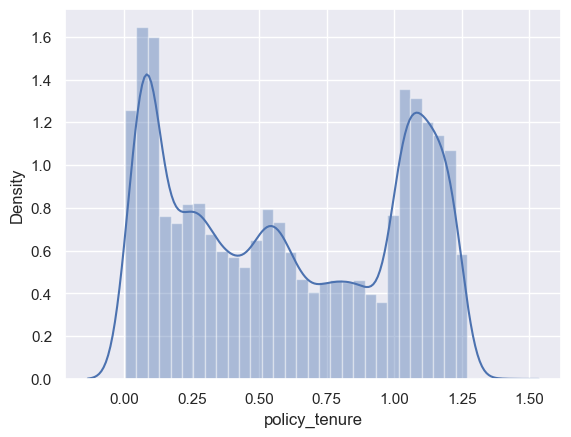

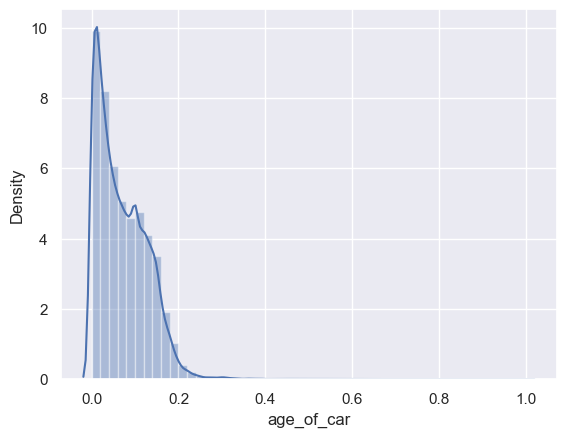

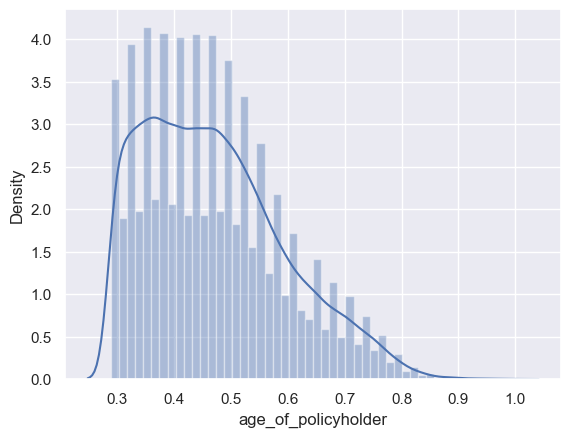

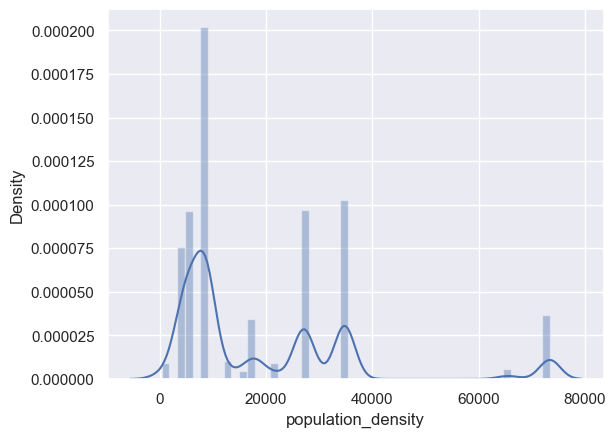

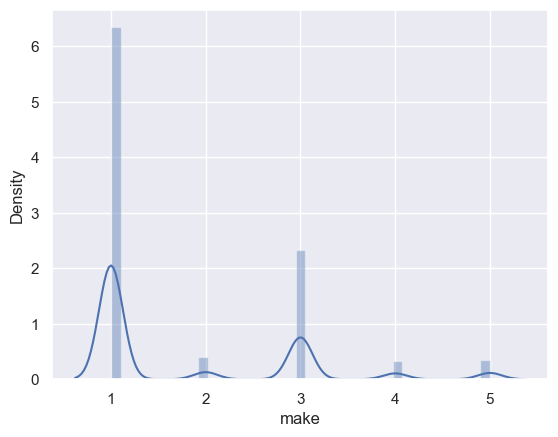

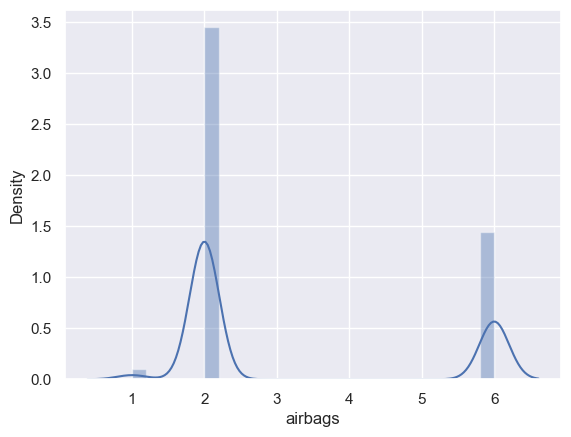

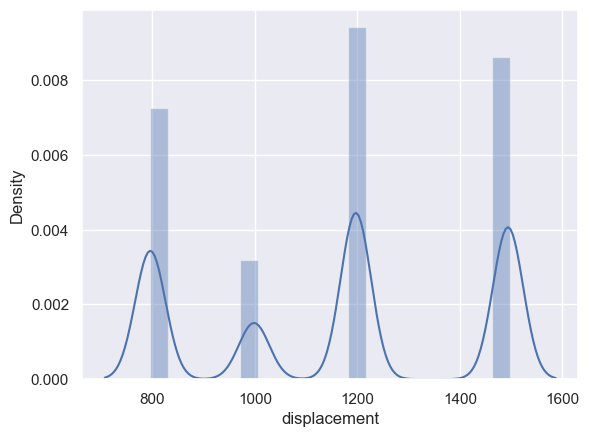

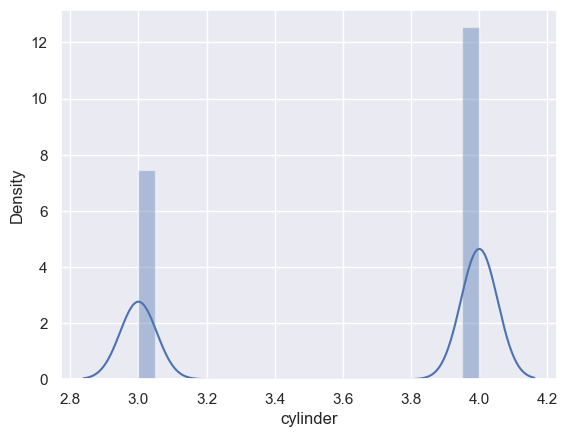

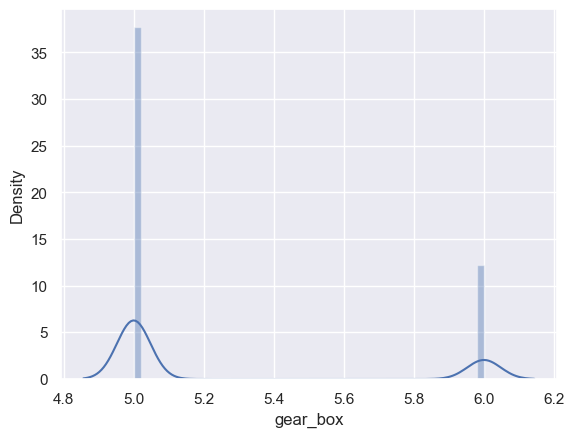

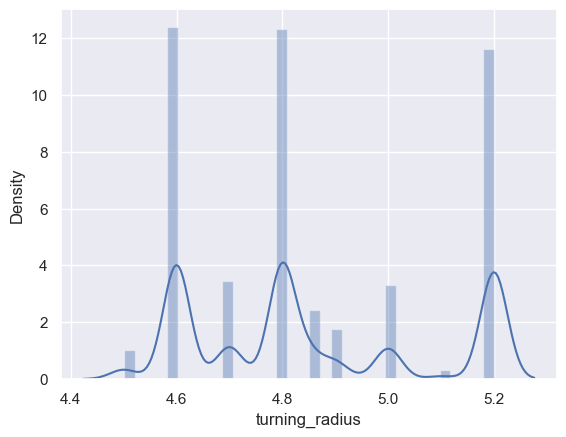

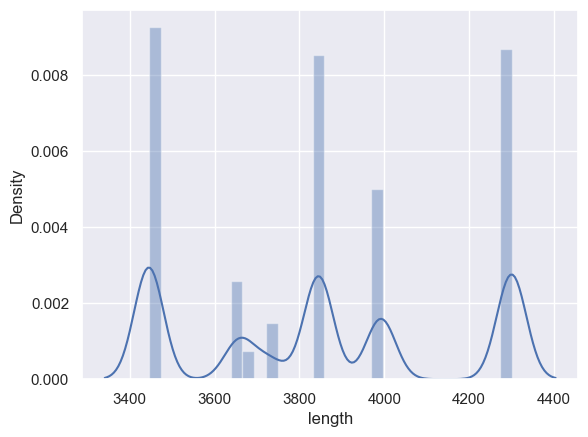

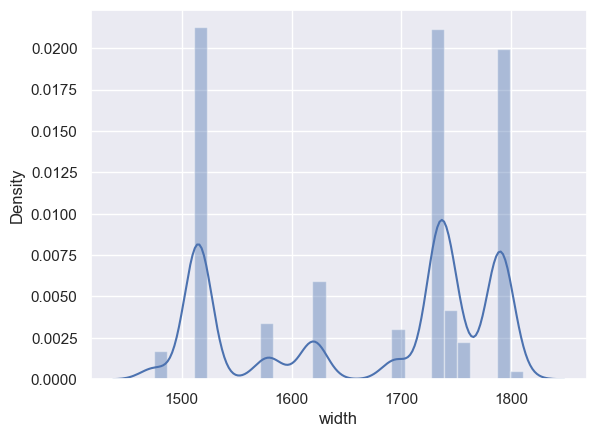

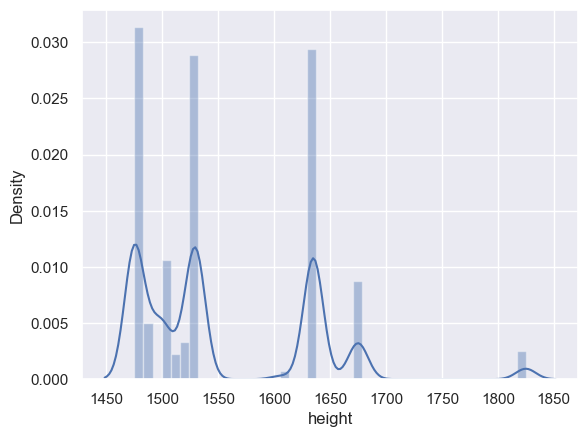

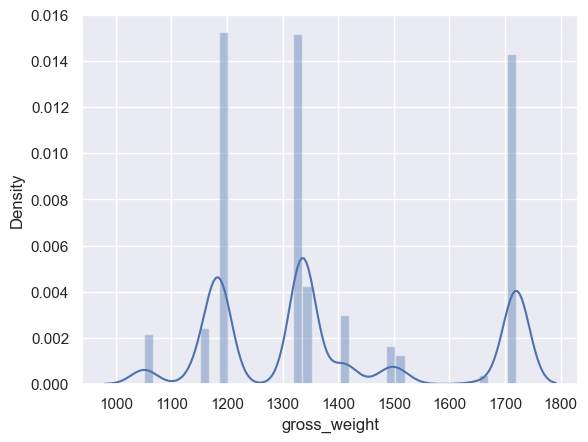

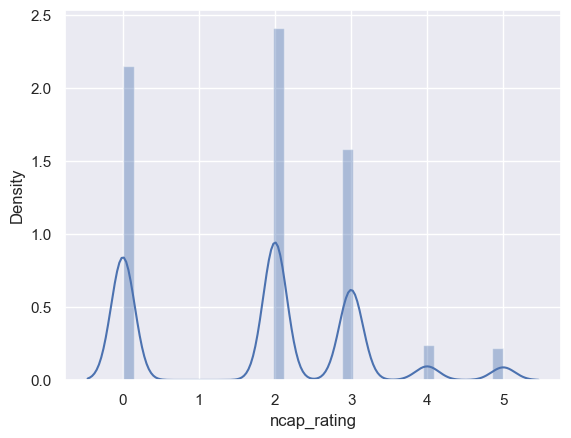

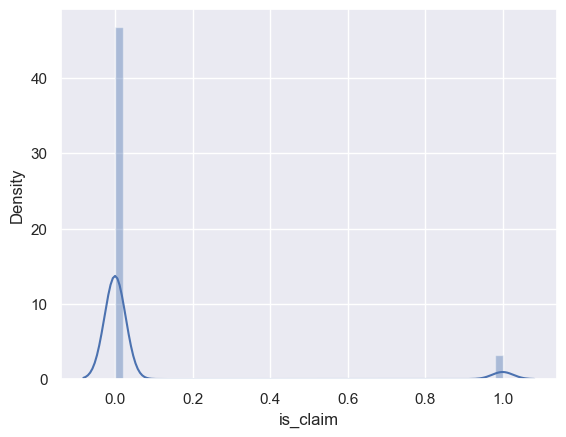

In [9]:
# distribution of the numerical variables

for column in df.columns:
    if df[column].dtype != 'O':
        sns.distplot(df[column])
        plt.show()

__________
\- Most numerical features appear to be normally distributed, with the exception of the age of the car and age of the policy holders. 
__________

\- We will employ a boxplot for further investigation.
___________

**Outlier Detection and Treatment**

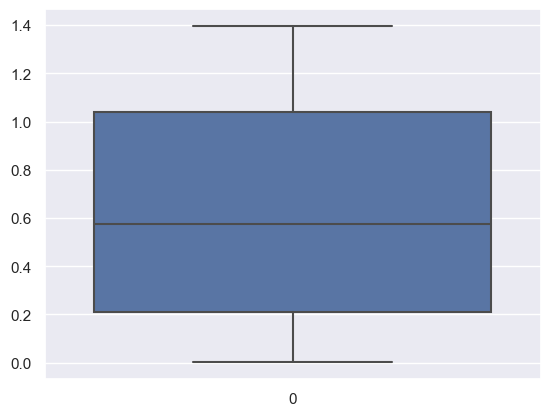

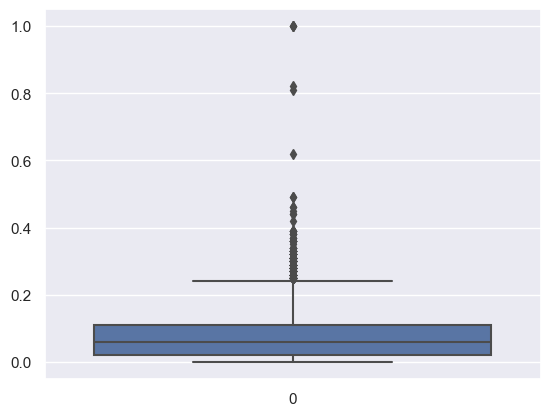

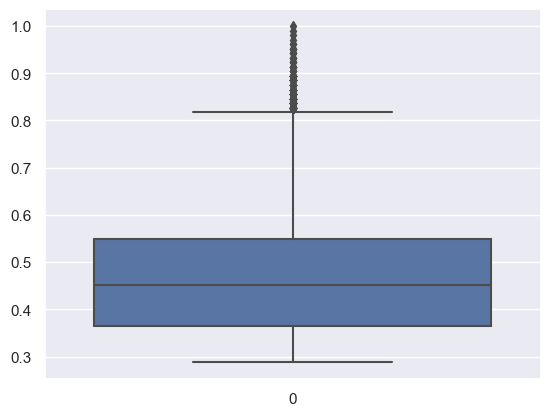

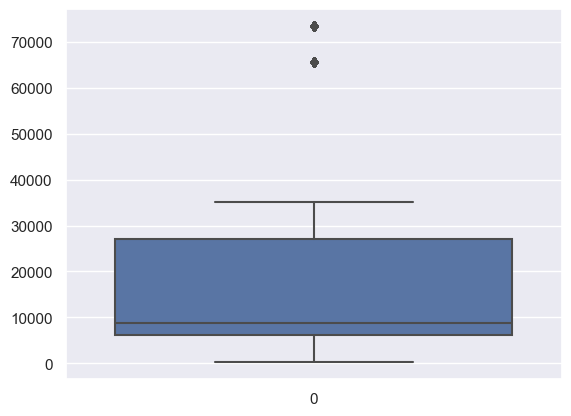

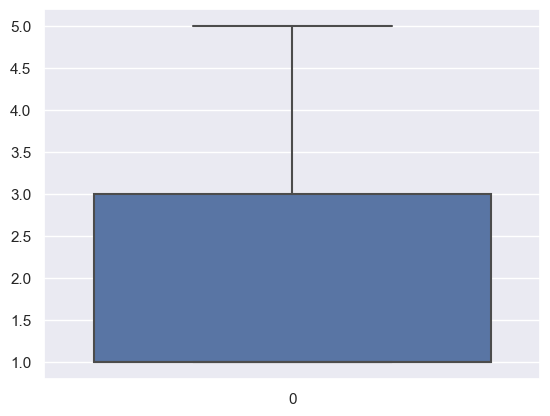

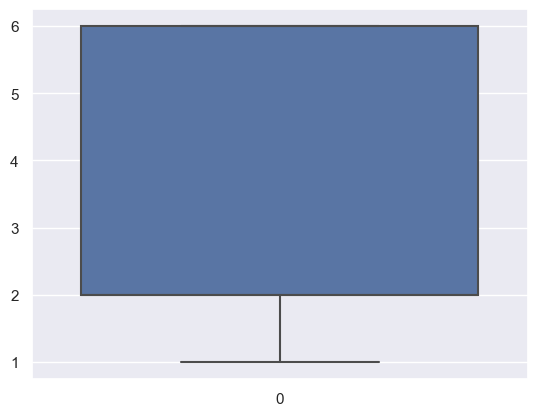

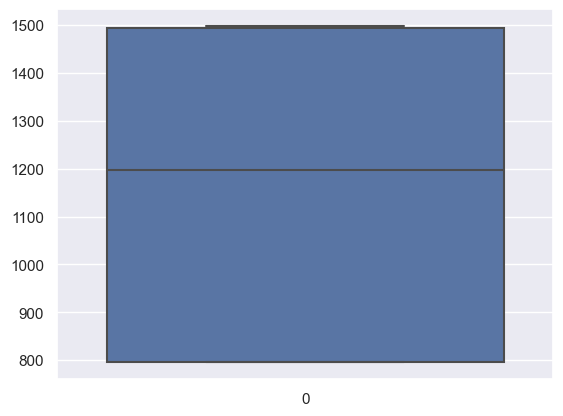

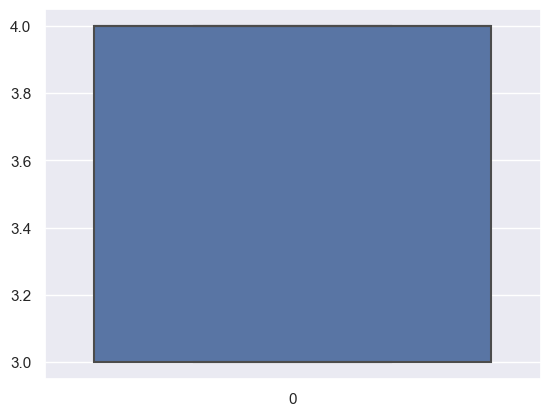

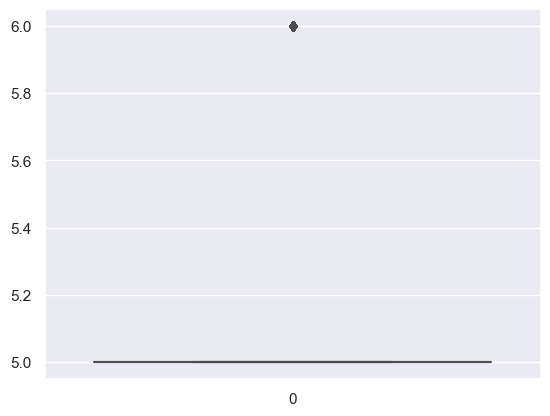

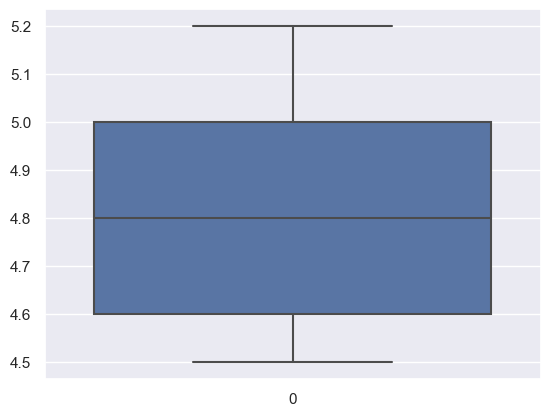

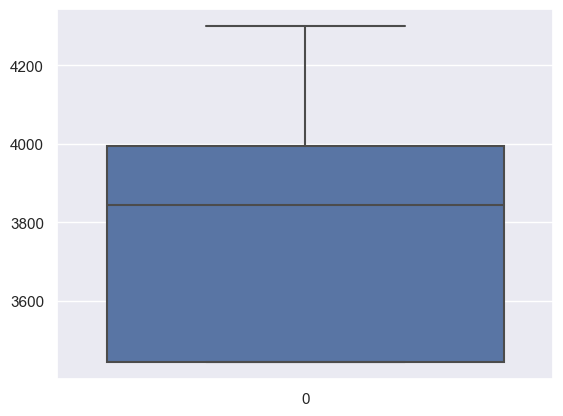

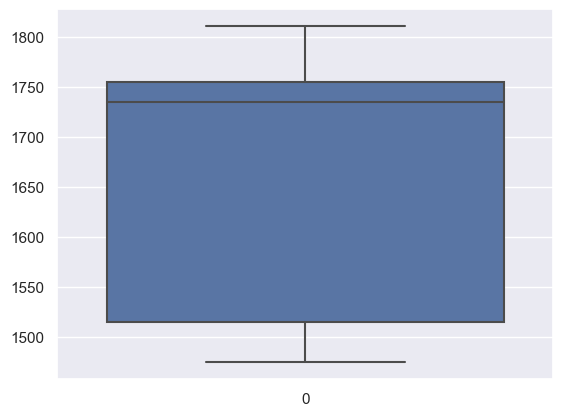

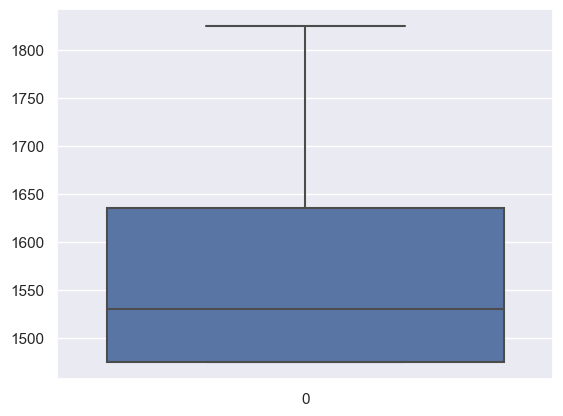

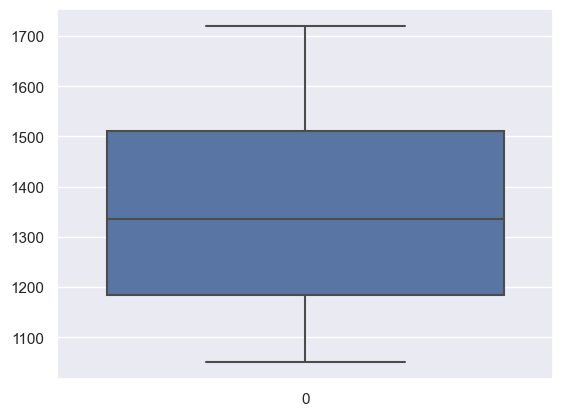

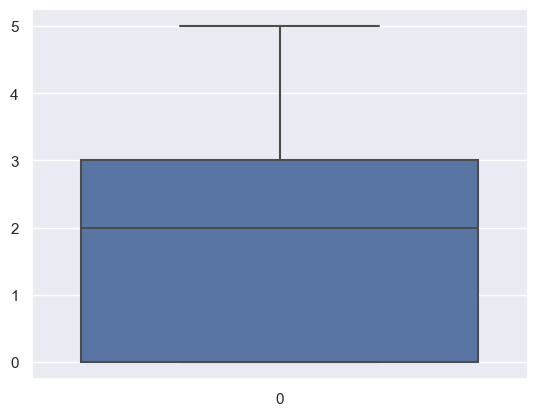

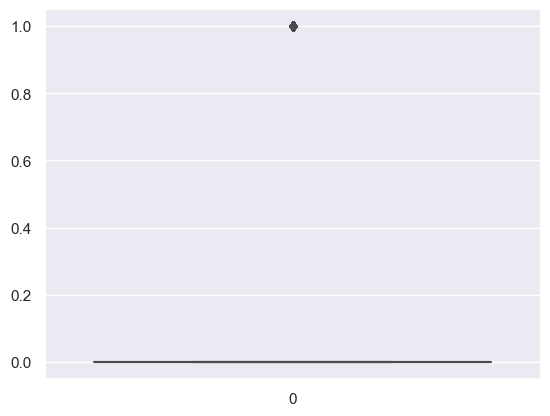

In [10]:
# outliers in numerical variables

for column in df.columns:
    if df[column].dtype != 'O':
        sns.boxplot(df[column])
        plt.show()

In [11]:
def count_outliers(data, column_name):
    """
    Count the number of outliers in a specific column of a dataframe using the IQR method.
    
    """
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers_below = data[data[column_name] < lower_bound]
    outliers_above = data[data[column_name] > upper_bound]
    
    total_outliers = len(outliers_below) + len(outliers_above)

    return (total_outliers / len(data)) * 100

In [12]:
print('age_of_car', count_outliers(df, 'age_of_car'))

print('age_of_policyholder', count_outliers(df, 'age_of_policyholder'))

print('population_density', count_outliers(df, 'population_density'))

age_of_car 0.4591070453304205
age_of_policyholder 0.3771845985800109
population_density 6.224399235390497


______________
\- The number of of the outliers present in age_of_the_car, age_of_policyholder and population_density  are 0.45%, 0.37% and 6.22% respectively. 

____________

\- We will remove these outliers from the dataset. 

___________

\- Before that lets make a copy of the dataset.

In [13]:
data = df.copy() # creating a copy of the data

In [14]:
def remove_outliers(data, column_name):
    """
    Remove outliers from a specific column of a dataframe using the IQR method.
    
    """
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers by keeping only valid values
    return data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]

In [15]:
data = remove_outliers(data, 'age_of_car')
data = remove_outliers(data, 'age_of_policyholder')
data = remove_outliers(data, 'population_density')

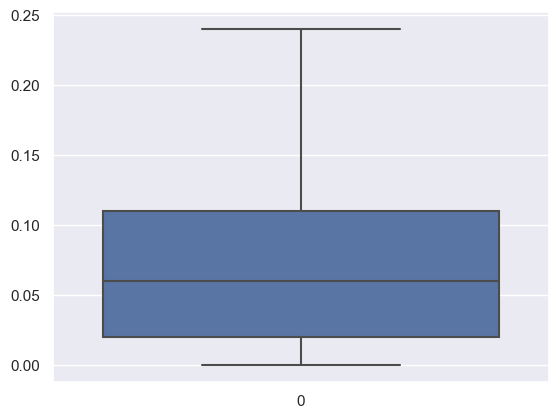

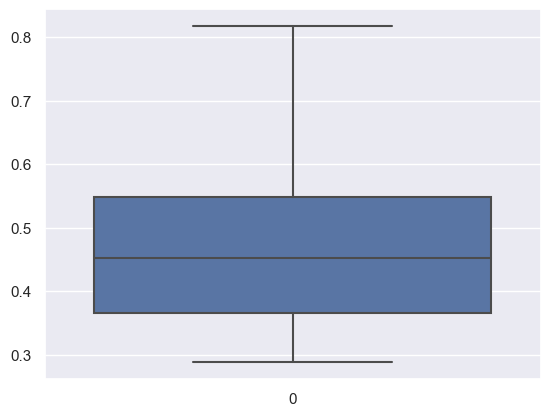

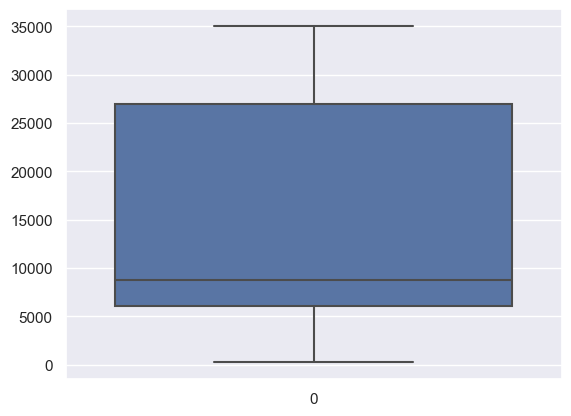

In [16]:
for column in ['age_of_car', 'age_of_policyholder','population_density']:
    sns.boxplot(data[column])
    plt.show()

In [17]:
#  seperating binary categorical variables and multi categorical variables

bin_column = [column for column in data.columns if data[column].dtype == 'O' 
              and data[column].nunique() == 2]

In [18]:
bin_column

['is_esc',
 'is_adjustable_steering',
 'is_tpms',
 'is_parking_sensors',
 'is_parking_camera',
 'rear_brakes_type',
 'transmission_type',
 'is_front_fog_lights',
 'is_rear_window_wiper',
 'is_rear_window_washer',
 'is_rear_window_defogger',
 'is_brake_assist',
 'is_power_door_locks',
 'is_central_locking',
 'is_power_steering',
 'is_driver_seat_height_adjustable',
 'is_day_night_rear_view_mirror',
 'is_ecw',
 'is_speed_alert']

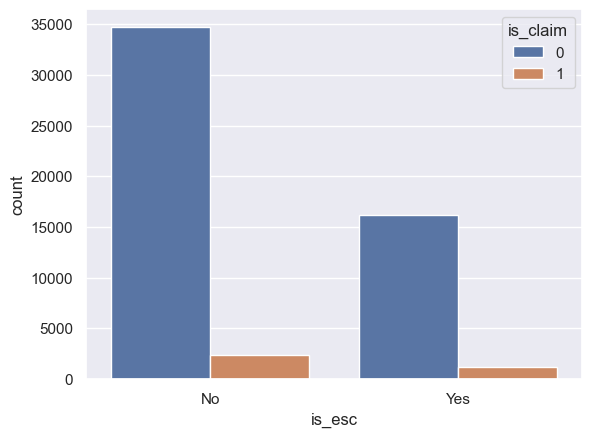

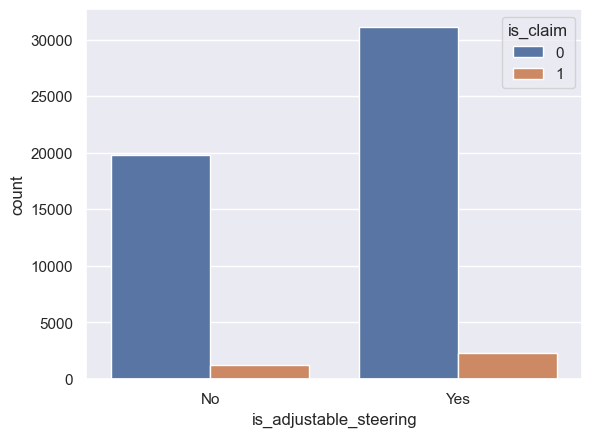

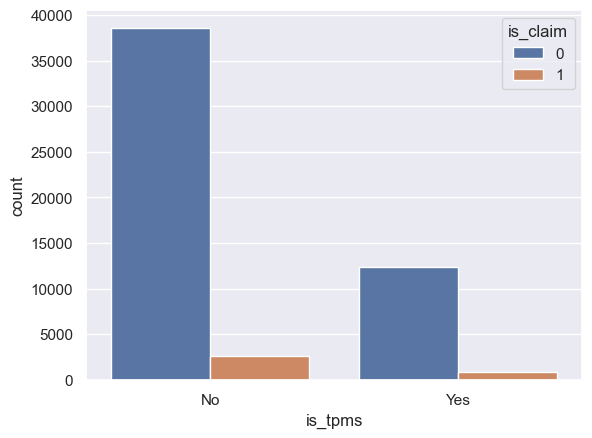

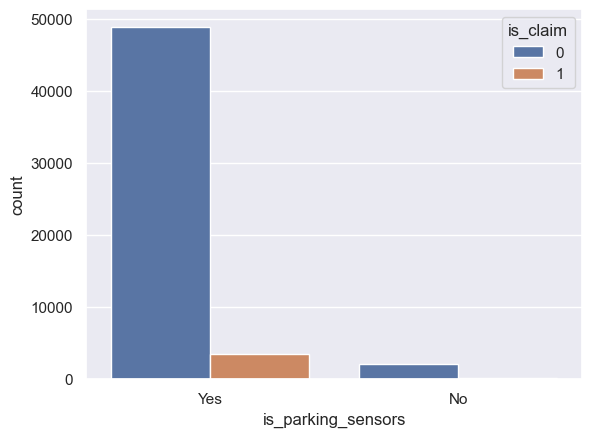

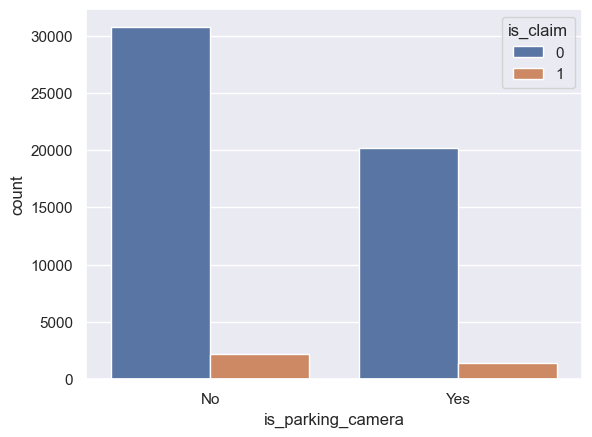

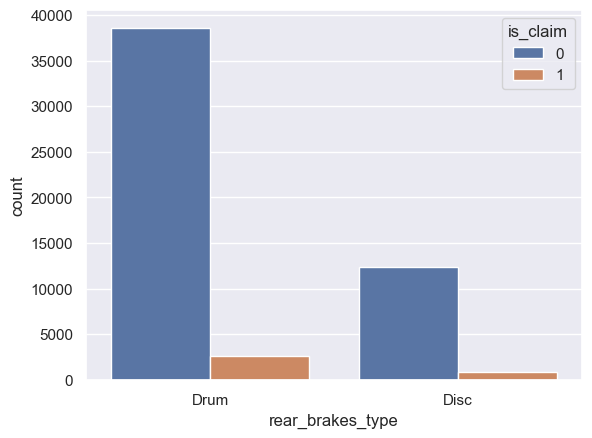

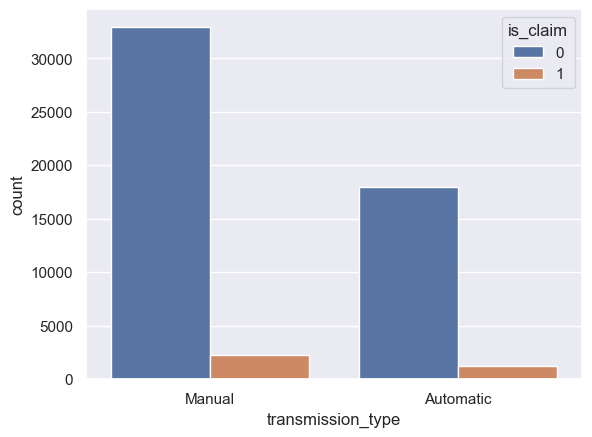

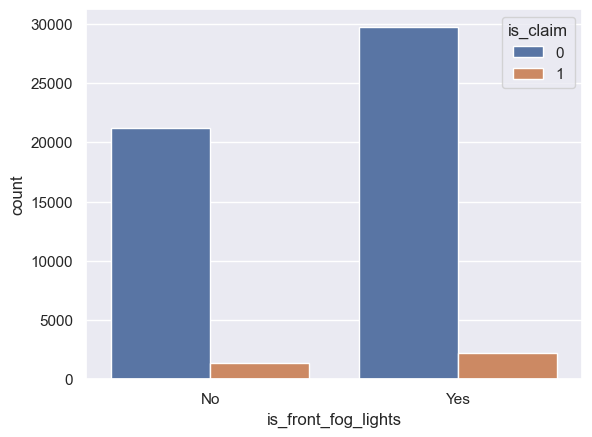

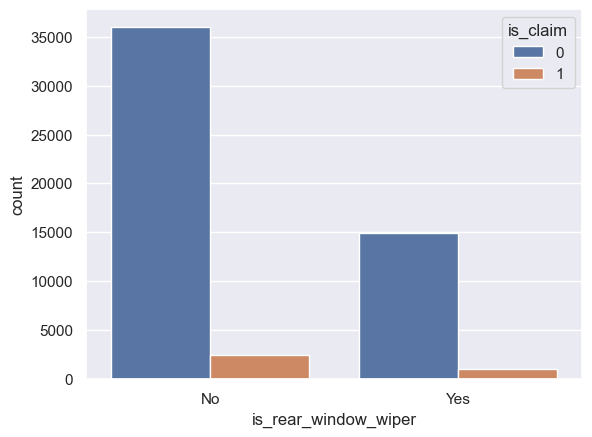

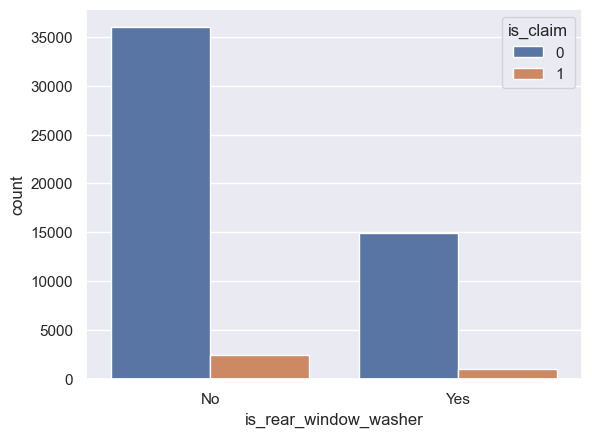

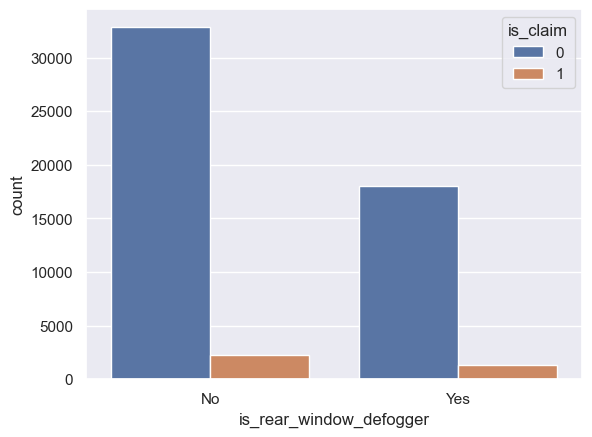

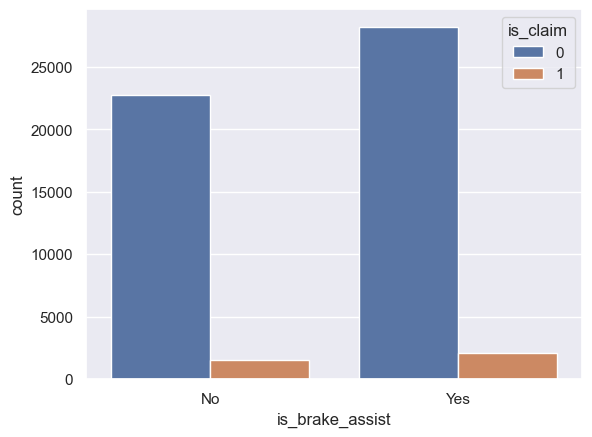

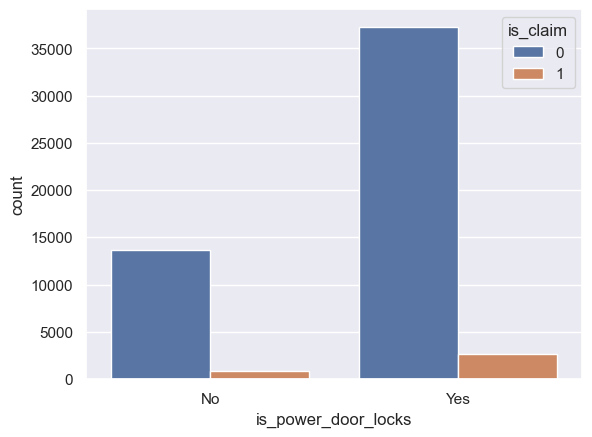

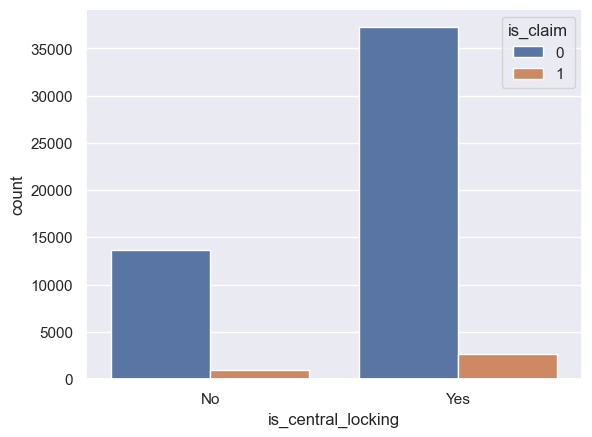

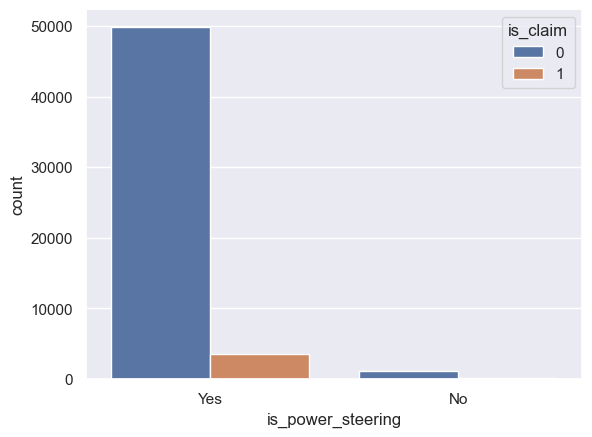

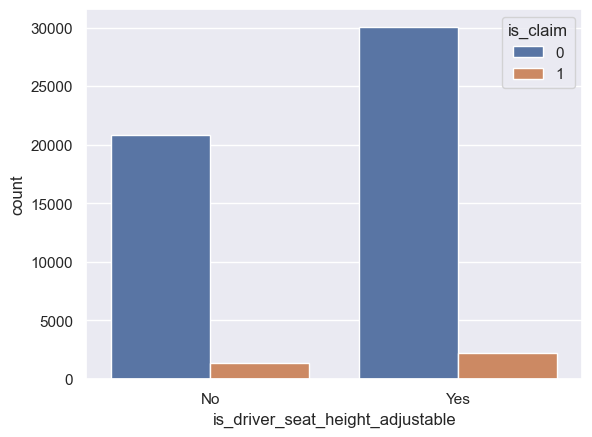

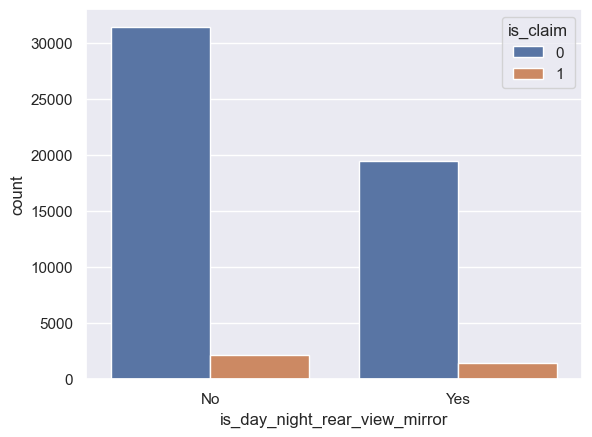

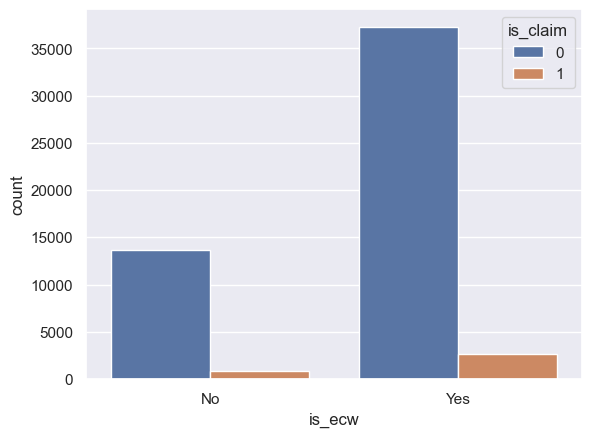

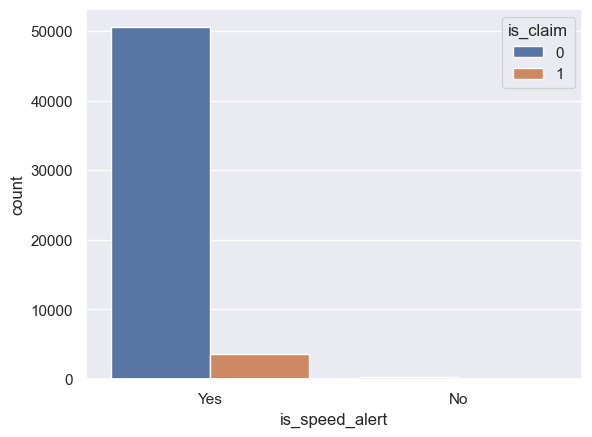

In [19]:
# count of each category in binary categorical variables

for feature in bin_column:
    sns.countplot(x=feature, hue='is_claim', data=data)
    plt.show()

____
\- Looks like the target variable is highly imbalanced, with a large number of policies having no claims. 
___

\- We'll have to deal with this imbalance later in the process.

____

\- Lets do same for the multi categorical variables

In [20]:
#  multi categorical variables

non_bin = [column for column in df.columns if df[column].dtype == 'O' and column not in bin_column]
print(non_bin)

['area_cluster', 'segment', 'model', 'fuel_type', 'max_torque', 'max_power', 'engine_type', 'steering_type']


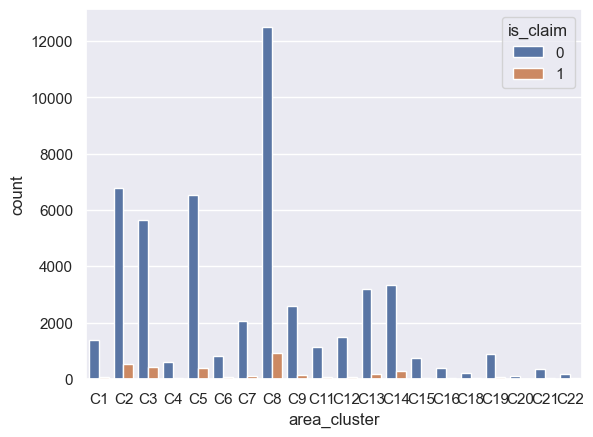

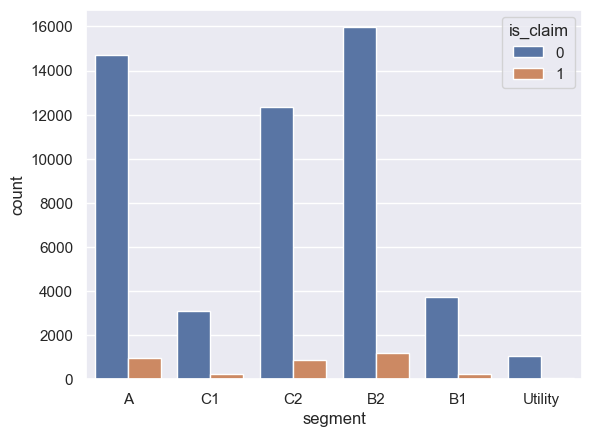

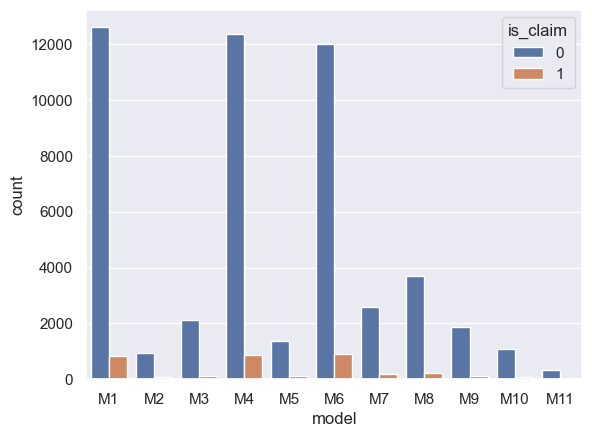

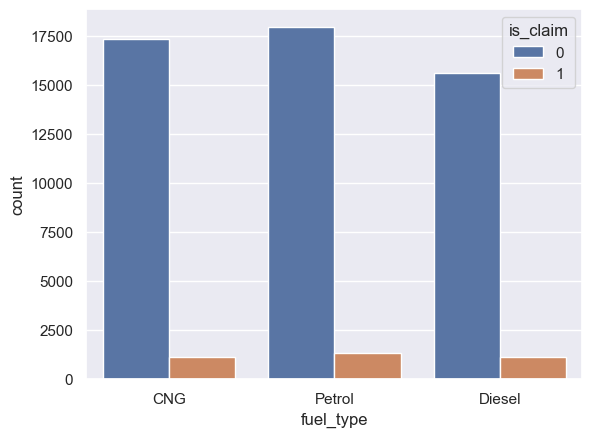

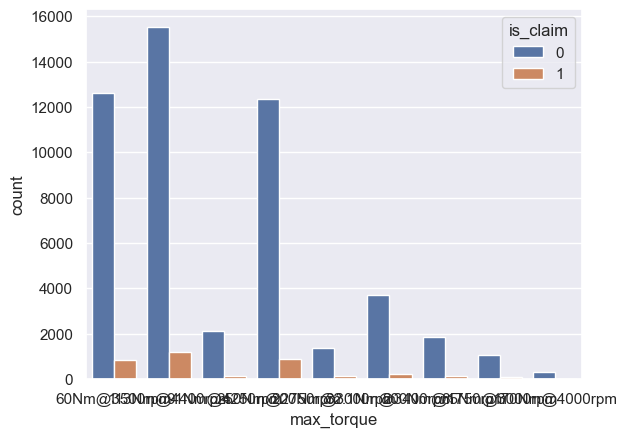

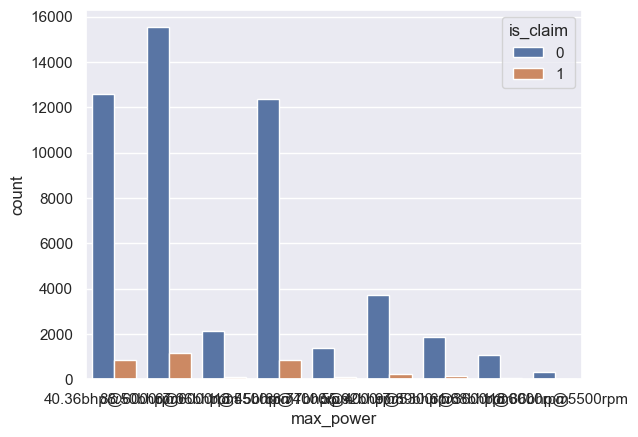

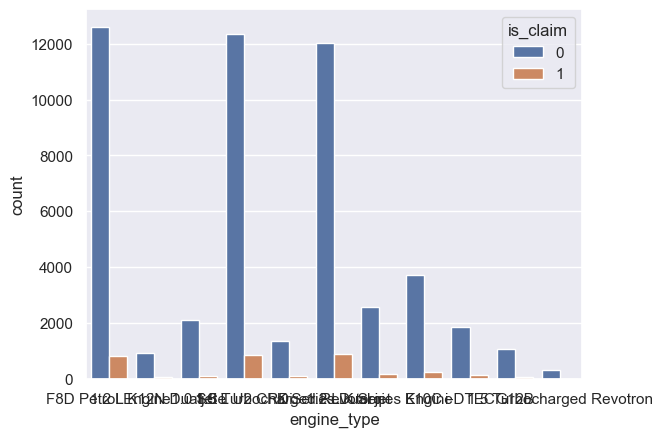

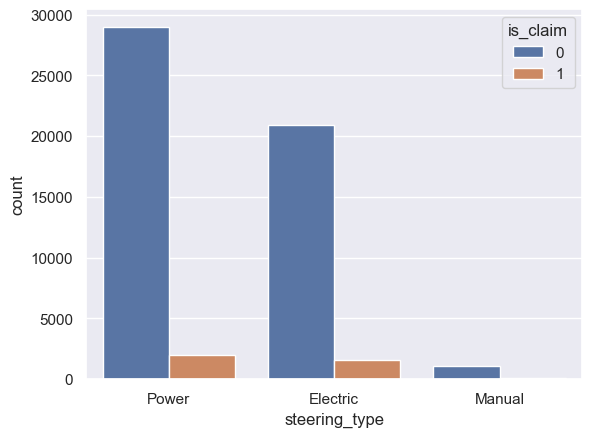

In [21]:
# count of each category in multi categorical variables

for feature in non_bin:
    sns.countplot(x = feature, hue = 'is_claim', data = data)
    plt.show()

In [22]:
df.corr()['is_claim'].sort_values(ascending = False) # correlation with label

is_claim               1.000000
policy_tenure          0.078747
age_of_policyholder    0.022435
cylinder               0.013434
width                  0.009947
displacement           0.007678
length                 0.006495
gross_weight           0.003894
ncap_rating            0.003800
airbags                0.002789
turning_radius         0.002724
make                  -0.000456
gear_box              -0.000635
height                -0.002024
population_density    -0.017808
age_of_car            -0.028172
Name: is_claim, dtype: float64

______
\- The target variable is_claim shows minimal linear correlation with other features. 
_____________
\- However, potential non-linear associations or feature combinations might still offer predictive value.
________

In [23]:
df.corr()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
policy_tenure,1.000000,0.166312,0.143676,-0.100307,0.086101,0.103981,0.194361,0.191185,0.095305,0.166426,0.190869,0.213228,0.119055,0.141027,0.173280,0.078747
age_of_car,0.166312,1.000000,-0.035427,-0.062255,0.188122,0.209073,0.393208,0.379522,0.201579,0.332716,0.383177,0.414104,0.259156,0.302127,0.348853,-0.028172
age_of_policyholder,0.143676,-0.035427,1.000000,0.009669,-0.031989,-0.008041,-0.023764,0.004183,-0.003115,-0.016764,-0.020138,-0.006135,-0.053930,-0.007758,-0.031628,0.022435
population_density,-0.100307,-0.062255,0.009669,1.000000,-0.035125,-0.060359,-0.090983,-0.091591,-0.056640,-0.077501,-0.091968,-0.098156,-0.065583,-0.077816,-0.071150,-0.017808
make,0.086101,0.188122,-0.031989,-0.035125,1.000000,0.501800,0.753344,0.410672,0.632807,0.753861,0.692365,0.511695,0.303274,0.481408,0.792254,-0.000456
airbags,0.103981,0.209073,-0.008041,-0.060359,0.501800,1.000000,0.661190,0.478594,0.859556,0.810820,0.809094,0.639562,0.423816,0.828988,0.341557,0.002789
displacement,0.194361,0.393208,-0.023764,-0.090983,0.753344,0.661190,1.000000,0.866231,0.692240,0.875407,0.961655,0.899302,0.554591,0.776210,0.847065,0.007678
cylinder,0.191185,0.379522,0.004183,-0.091591,0.410672,0.478594,0.866231,1.000000,0.410163,0.615806,0.805476,0.862430,0.352118,0.602978,0.598364,0.013434
gear_box,0.095305,0.201579,-0.003115,-0.056640,0.632807,0.859556,0.692240,0.410163,1.000000,0.861740,0.808975,0.601923,0.579725,0.894639,0.529688,-0.000635
turning_radius,0.166426,0.332716,-0.016764,-0.077501,0.753861,0.810820,0.875407,0.615806,0.861740,1.000000,0.944899,0.825603,0.460436,0.823097,0.779302,0.002724


In [24]:
def get_correlation(df, col1, col2):

    ''' Returns the correlation between two columns of a dataframe'''

    return df[col1].corr(df[col2])

In [25]:
num_column = [column for column in data.columns if data[column].dtype != 'O']

In [26]:
# Ccorrelation (multicollinearity)

columns = num_column  
threshold = 0.8

for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]
        correlation = get_correlation(df, col1, col2)
        
        if abs(correlation) >= threshold:
            print(f"Columns {col1} and {col2} have a correlation of {correlation:.2f}")

Columns airbags and gear_box have a correlation of 0.86
Columns airbags and turning_radius have a correlation of 0.81
Columns airbags and length have a correlation of 0.81
Columns airbags and gross_weight have a correlation of 0.83
Columns displacement and cylinder have a correlation of 0.87
Columns displacement and turning_radius have a correlation of 0.88
Columns displacement and length have a correlation of 0.96
Columns displacement and width have a correlation of 0.90
Columns displacement and ncap_rating have a correlation of 0.85
Columns cylinder and length have a correlation of 0.81
Columns cylinder and width have a correlation of 0.86
Columns gear_box and turning_radius have a correlation of 0.86
Columns gear_box and length have a correlation of 0.81
Columns gear_box and gross_weight have a correlation of 0.89
Columns turning_radius and length have a correlation of 0.94
Columns turning_radius and width have a correlation of 0.83
Columns turning_radius and gross_weight have a cor

_________
\- Many numerical variables are highly correlated with each other so we will keep this in mind while building our model.
__________

<div style="color: #7B3EC6; font-weight: bold; font-size: 18px; white-space: nowrap;">
 Feature Engineering
 </div>

In [27]:
# importing label encoder

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [28]:
# binary categorical variables

for column in bin_column:
    data[column] = label_encoder.fit_transform(data[column])

In [29]:
pd.set_option('display.max_columns', None) # display all columns

In [30]:
data.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,1,1197,4,0,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,1,999,3,0,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0


In [31]:
for column in non_bin:
    print(f'{column} : {data[column].nunique()}') # classes in each multiclass feature

area_cluster : 20
segment : 6
model : 11
fuel_type : 3
max_torque : 9
max_power : 9
engine_type : 11
steering_type : 3


________
\- We will do one hot encoding to some of the multi categorical variables
__________

In [32]:
# One Hot Encoding

data_en = pd.get_dummies(data, columns = ['fuel_type','steering_type','segment'], drop_first = True)

In [33]:
data_en.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,model,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,fuel_type_Diesel,fuel_type_Petrol,steering_type_Manual,steering_type_Power,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility
0,0.515874,0.05,0.644231,C1,4990,1,M1,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0.672619,0.02,0.375000,C2,27003,1,M1,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0.841110,0.02,0.384615,C3,4076,1,M1,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0.900277,0.11,0.432692,C4,21622,1,M2,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,1,1197,4,0,5,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0,0,1,0,0,0,0,1,0,0
4,0.596403,0.11,0.634615,C5,34738,2,M3,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,1,999,3,0,5,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0,0,1,0,0,0,0,0,0,0


In [34]:
data['area_cluster'].head()

0    C1
1    C2
2    C3
3    C4
4    C5
Name: area_cluster, dtype: object

In [35]:
data['area_cluster'].value_counts()

C8     13437
C2      7303
C5      6949
C3      6077
C14     3629
C13     3393
C9      2714
C7      2158
C12     1568
C1      1459
C11     1204
C19      948
C6       881
C15      768
C4       660
C16      401
C21      377
C18      242
C22      205
C20      107
Name: area_cluster, dtype: int64

_______
\- Looks like th area_cluster variable is ordinal in nature so we will remove the character 'C' from the variable and convert it to numeric.
_________

In [36]:
data_en['area_cluster'] = data_en['area_cluster'].apply(lambda x : x [1:]).astype(int)

In [37]:
data_en.tail()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,model,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,fuel_type_Diesel,fuel_type_Petrol,steering_type_Manual,steering_type_Power,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility
58587,0.355089,0.13,0.644231,8,8794,2,M3,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,1,999,3,0,5,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0,0,1,0,0,0,0,0,0,0
58588,1.199642,0.02,0.519231,14,7788,1,M1,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
58589,1.162273,0.05,0.451923,5,34738,1,M1,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
58590,1.236307,0.14,0.557692,8,8794,1,M6,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,0,1,0,1,0,1,1197,4,1,5,4.8,3845,1735,1530,1335,1,0,0,0,1,1,1,1,1,1,1,1,2,0,0,1,0,0,0,1,0,0,0
58591,0.124429,0.02,0.442308,8,8794,3,M4,250Nm@2750rpm,113.45bhp@4000rpm,1.5 L U2 CRDi,6,1,1,1,1,1,0,1493,4,0,6,5.2,4300,1790,1635,1720,1,1,1,1,1,1,1,1,1,0,1,1,3,0,1,0,0,1,0,0,0,1,0


In [38]:
data_en['model'].value_counts()

M1     13430
M4     13233
M6     12915
M8      3940
M7      2770
M3      2233
M9      1991
M5      1484
M10     1139
M2      1012
M11      333
Name: model, dtype: int64

___________
\- Above column is also ordinal in nature so we will remove the first character from the variable and convert it to numeric.
________

In [39]:
data_en['model'] = data_en['model'].apply(lambda x : x [1:]).astype(int)

In [40]:
data_en.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,model,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,fuel_type_Diesel,fuel_type_Petrol,steering_type_Manual,steering_type_Power,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility
0,0.515874,0.05,0.644231,1,4990,1,1,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0.672619,0.02,0.375000,2,27003,1,1,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,0.841110,0.02,0.384615,3,4076,1,1,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,1,796,3,1,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,0.900277,0.11,0.432692,4,21622,1,2,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,1,1197,4,0,5,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0,0,1,0,0,0,0,1,0,0
4,0.596403,0.11,0.634615,5,34738,2,3,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,1,999,3,0,5,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0,0,1,0,0,0,0,0,0,0


________
\- Lets extract numeric values from max_power and max_torque and make one new column from each that will represent the max_power per rpm and max_torque per rpm.
_________

In [41]:
def extract1(val):

    ''' This function is used to extract int values and return their division'''

    val1 = float (val.split('@')[0][:-2])
    val2 = float (val.split('@')[1][:-3])
    return val1/val2

In [42]:
data_en['max_torque/rpm'] = data_en['max_torque'].apply(extract1)

In [43]:
def extract2(val):
    
    '''This function is used to extract int values and return their division'''
    
    val1 = float (val.split('@')[0][:-3])
    val2 = float (val.split('@')[1][:-3])
    return val1/val2

In [44]:
data_en ['max_power/rpm'] = data_en['max_power'].apply(extract2)

In [45]:
# dropping the original columns

data_en.drop(['max_torque', 'max_power'], axis = 1, inplace = True)

In [46]:
data_en = pd.get_dummies(data_en, columns= ['engine_type'],drop_first = True) # encoding

In [47]:
data_en.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,model,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,fuel_type_Diesel,fuel_type_Petrol,steering_type_Manual,steering_type_Power,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,max_torque/rpm,max_power/rpm,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC
0,0.515874,0.05,0.644231,1,4990,1,1,2,0,0,0,1,0,1,796,3,1,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.017143,0.006727,0,0,0,0,0,1,0,0,0,0
1,0.672619,0.02,0.375000,2,27003,1,1,2,0,0,0,1,0,1,796,3,1,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.017143,0.006727,0,0,0,0,0,1,0,0,0,0
2,0.841110,0.02,0.384615,3,4076,1,1,2,0,0,0,1,0,1,796,3,1,5,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.017143,0.006727,0,0,0,0,0,1,0,0,0,0
3,0.900277,0.11,0.432692,4,21622,1,2,2,1,1,0,1,1,1,1197,4,0,5,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0,0,1,0,0,0,0,1,0,0,0.025682,0.014750,0,1,0,0,0,0,0,0,0,0
4,0.596403,0.11,0.634615,5,34738,2,3,2,0,0,0,0,1,1,999,3,0,5,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0,0,1,0,0,0,0,0,0,0,0.021412,0.012193,0,0,0,0,0,0,0,0,0,0


__________
\- We will make new column from length, width and height that will represent the volume the of the car.
_________

In [48]:
data_en['volume_of_car'] = data_en['length'] * data_en['width'] * data_en['height']

In [49]:
# dropping the original columns

data_en.drop(['length', 'width', 'height'], axis = 1, inplace = True)

In [50]:
data_en.head(2)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,model,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,turning_radius,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,fuel_type_Diesel,fuel_type_Petrol,steering_type_Manual,steering_type_Power,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,max_torque/rpm,max_power/rpm,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,volume_of_car
0,0.515874,0.05,0.644231,1,4990,1,1,2,0,0,0,1,0,1,796,3,1,5,4.6,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.017143,0.006727,0,0,0,0,0,1,0,0,0,0,7698283125
1,0.672619,0.02,0.375000,2,27003,1,1,2,0,0,0,1,0,1,796,3,1,5,4.6,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.017143,0.006727,0,0,0,0,0,1,0,0,0,0,7698283125


**Feature scaling**

In [51]:
cols_to_scale = ['population_density','displacement','gross_weight','volume_of_car']

In [52]:
# Checking outliers in the columns to be scaled

for col in cols_to_scale:
    print(f"{col} : {count_outliers(data_en, col)}")

population_density : 0.0
displacement : 0.0
gross_weight : 0.0
volume_of_car : 0.0


________
\- Lets do standard scaling to displacement, gross_weight, volume_of_car, population_density as they dont have outliers.
______

In [53]:
cols_to_scale = ['population_density','displacement','gross_weight','volume_of_car']

In [54]:
# Scaling displacement, gross_weight, volume_of_car and population_density

from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()

for column in cols_to_scale:
    data_en[column] = s_scaler.fit_transform(data_en[[column]])

In [55]:
data_en.head(2)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,model,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,turning_radius,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,fuel_type_Diesel,fuel_type_Petrol,steering_type_Manual,steering_type_Power,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,max_torque/rpm,max_power/rpm,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,volume_of_car
0,0.515874,0.05,0.644231,1,-0.905331,1,1,2,0,0,0,1,0,1,-1.39876,3,1,5,4.6,-0.953336,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.017143,0.006727,0,0,0,0,0,1,0,0,0,0,-1.38936
1,0.672619,0.02,0.375000,2,1.029482,1,1,2,0,0,0,1,0,1,-1.39876,3,1,5,4.6,-0.953336,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.017143,0.006727,0,0,0,0,0,1,0,0,0,0,-1.38936


In [56]:
data_en.shape  # 

(54480, 56)

In [57]:
# Loss of the data during Outlier treatment

((58592 - 54480) / 58592) * 100

7.01802293828509

____________

 <div style="color: #7B3EC6; font-weight: bold; font-size: 18px; white-space: nowrap;">
Model Building & Evaluation
 </div>

In [58]:
# Splitting the data into independent and dependent variables

X = data_en.drop('is_claim', axis = 1)

y = data_en['is_claim']

Now, lets up-sample the data using OverSampling

In [59]:
# Imbalance Data Treatment

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

X_oversampled, y_oversampled = ros.fit_resample(X, y)

In [60]:
# Splitting the data into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, 
                                                    test_size = 0.3, random_state = 101)

In [61]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [62]:
def train_eval_model(model):
    
    '''
    This function train & Evaluate the given model
    
    '''
    model.fit(X_train, y_train) # training
    y_pred_test = model.predict(X_test) #  test prediction
    y_pred_train = model.predict(X_train) #  training prediction
    
    print('\n',type(model).__name__)
    
    print('=='*25)
    print('\nTraining Accuracy :', accuracy_score(y_train, y_pred_train)) # training accuracy
    print('\nTest Accuracy :', accuracy_score(y_test, y_pred_test)) # test accuracy
    print('__'*25)
    print('\nConfusion Matrix:\n\n', confusion_matrix(y_test, y_pred_test)) # confusion matrix
    print('__'*25)
    print('\nClassification Report: \n')
    
    return  classification_report(y_test, y_pred_test) # classification report

In [63]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

print(train_eval_model(log_reg))


 LogisticRegression

Training Accuracy : 0.5746259237964352

Test Accuracy : 0.5695167042963254
__________________________________________________

Confusion Matrix:

 [[8325 6874]
 [6282 9080]]
__________________________________________________

Classification Report: 

              precision    recall  f1-score   support

           0       0.57      0.55      0.56     15199
           1       0.57      0.59      0.58     15362

    accuracy                           0.57     30561
   macro avg       0.57      0.57      0.57     30561
weighted avg       0.57      0.57      0.57     30561



In [64]:
# kNN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

print(train_eval_model(knn))


 KNeighborsClassifier

Training Accuracy : 0.9173736835462565

Test Accuracy : 0.8776545270115507
__________________________________________________

Confusion Matrix:

 [[11499  3700]
 [   39 15323]]
__________________________________________________

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.76      0.86     15199
           1       0.81      1.00      0.89     15362

    accuracy                           0.88     30561
   macro avg       0.90      0.88      0.88     30561
weighted avg       0.90      0.88      0.88     30561



In [65]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

print(train_eval_model(dtc))


 DecisionTreeClassifier

Training Accuracy : 1.0

Test Accuracy : 0.9532410588658748
__________________________________________________

Confusion Matrix:

 [[13770  1429]
 [    0 15362]]
__________________________________________________

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     15199
           1       0.91      1.00      0.96     15362

    accuracy                           0.95     30561
   macro avg       0.96      0.95      0.95     30561
weighted avg       0.96      0.95      0.95     30561



In [66]:
# Naive Bayes

from sklearn.naive_bayes import GaussianNB
nbc = GaussianNB()

print(train_eval_model(nbc))


 GaussianNB

Training Accuracy : 0.5157974449228008

Test Accuracy : 0.5154281600732961
__________________________________________________

Confusion Matrix:

 [[5848 9351]
 [5458 9904]]
__________________________________________________

Classification Report: 

              precision    recall  f1-score   support

           0       0.52      0.38      0.44     15199
           1       0.51      0.64      0.57     15362

    accuracy                           0.52     30561
   macro avg       0.52      0.51      0.51     30561
weighted avg       0.52      0.52      0.51     30561



_______
\- From above evaluation, we can see that Decision Tree working better than other models. 
_________
\- So, we chose Decision Tree as our base model. Lets see how ensemble model of Decision Tree i.e. Random Forest perform.  
_______

In [67]:
# Randon Forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

print(train_eval_model(rfc))


 RandomForestClassifier

Training Accuracy : 1.0

Test Accuracy : 0.9822649782402408
__________________________________________________

Confusion Matrix:

 [[14657   542]
 [    0 15362]]
__________________________________________________

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15199
           1       0.97      1.00      0.98     15362

    accuracy                           0.98     30561
   macro avg       0.98      0.98      0.98     30561
weighted avg       0.98      0.98      0.98     30561



**Hyper Parameter Tuning**

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]}

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2, scoring = 'accuracy')

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [69]:
print(grid_search.best_params_)

{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [70]:
rfc_truned = RandomForestClassifier(bootstrap = False, max_depth = None, 
                             max_features = 'sqrt', min_samples_leaf = 1, 
                             min_samples_split = 2, n_estimators = 200)

print(train_eval_model(rfc))


 RandomForestClassifier

Training Accuracy : 1.0

Test Accuracy : 0.9822322567978796
__________________________________________________

Confusion Matrix:

 [[14656   543]
 [    0 15362]]
__________________________________________________

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15199
           1       0.97      1.00      0.98     15362

    accuracy                           0.98     30561
   macro avg       0.98      0.98      0.98     30561
weighted avg       0.98      0.98      0.98     30561



**Feature Importance**

In [71]:
best_rf = grid_search.best_estimator_
important_features = best_rf.feature_importances_

feature_names = X_train.columns
for feature, importance in zip(feature_names, important_features):
    print(f"{feature} : {np.round(importance,3)}")

policy_tenure : 0.424
age_of_car : 0.187
age_of_policyholder : 0.258
area_cluster : 0.059
population_density : 0.059
make : 0.0
model : 0.001
airbags : 0.0
is_esc : 0.0
is_adjustable_steering : 0.0
is_tpms : 0.0
is_parking_sensors : 0.0
is_parking_camera : 0.0
rear_brakes_type : 0.0
displacement : 0.001
cylinder : 0.0
transmission_type : 0.0
gear_box : 0.0
turning_radius : 0.001
gross_weight : 0.001
is_front_fog_lights : 0.0
is_rear_window_wiper : 0.0
is_rear_window_washer : 0.0
is_rear_window_defogger : 0.0
is_brake_assist : 0.0
is_power_door_locks : 0.0
is_central_locking : 0.0
is_power_steering : 0.0
is_driver_seat_height_adjustable : 0.0
is_day_night_rear_view_mirror : 0.0
is_ecw : 0.0
is_speed_alert : 0.0
ncap_rating : 0.001
fuel_type_Diesel : 0.0
fuel_type_Petrol : 0.0
steering_type_Manual : 0.0
steering_type_Power : 0.0
segment_B1 : 0.0
segment_B2 : 0.0
segment_C1 : 0.0
segment_C2 : 0.0
segment_Utility : 0.0
max_torque/rpm : 0.001
max_power/rpm : 0.001
engine_type_1.2 L K Series

**Important Features**

> policy_tenure : 0.42

> age_of_car : 0.18

> age_of_policyholder : 0.25

> area_cluster : 0.06

> population_density : 0.06

_______
\- Above are the most important feature, We don't need others, as you can see, they have very low feature importance
_________
\- Let's drop unimportant features and try some other ensemble tecniques along with Random Forest.

**Feature Selection**

In [72]:
X = data_en[['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density']]

y = data_en['is_claim']

In [73]:
# Imbalance Data Treatment

from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()

X_oversampled, y_oversampled = ros.fit_resample(X, y)

In [74]:
# Splitting the data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size = 0.3, random_state = 101)

In [75]:
# Randon Forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

print(train_eval_model(rfc))


 RandomForestClassifier

Training Accuracy : 1.0

Test Accuracy : 0.9815778279506561
__________________________________________________

Confusion Matrix:

 [[14636   563]
 [    0 15362]]
__________________________________________________

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     15199
           1       0.96      1.00      0.98     15362

    accuracy                           0.98     30561
   macro avg       0.98      0.98      0.98     30561
weighted avg       0.98      0.98      0.98     30561



In [76]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]}

grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2, scoring = 'accuracy')

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [77]:
print(grid_search.best_params_)

{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [78]:
# Randon Forest

rfc = RandomForestClassifier(bootstrap = False, max_depth = None, 
                             max_features = 'sqrt', min_samples_leaf = 1, 
                             min_samples_split = 2, n_estimators = 50)

print(train_eval_model(rfc))


 RandomForestClassifier

Training Accuracy : 1.0

Test Accuracy : 0.9870095873826118
__________________________________________________

Confusion Matrix:

 [[14802   397]
 [    0 15362]]
__________________________________________________

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     15199
           1       0.97      1.00      0.99     15362

    accuracy                           0.99     30561
   macro avg       0.99      0.99      0.99     30561
weighted avg       0.99      0.99      0.99     30561



In [79]:
# Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rfc, X_train, y_train, cv = 5)

In [80]:
print("\nCross-validation scores:")
print('\n',list(scores))
print('__'*50)

print("\nMean score :", scores.mean())

print("\nStandard deviation :", scores.std())


Cross-validation scores:

 [0.985275557425326, 0.984504277099986, 0.9828214836628804, 0.9821904361239658, 0.9816282168150902]
____________________________________________________________________________________________________

Mean score : 0.9832839942254497

Standard deviation : 0.001386131194905759


______
\- The model showcases a consistently high accuracy of approximately 98.3% across various data folds, indicating effective generalization.

_________
\- A minimal standard deviation of 0.001, paired with consistent performance, suggests that the model is both robust and unlikely to be overfitting to the training data.
______

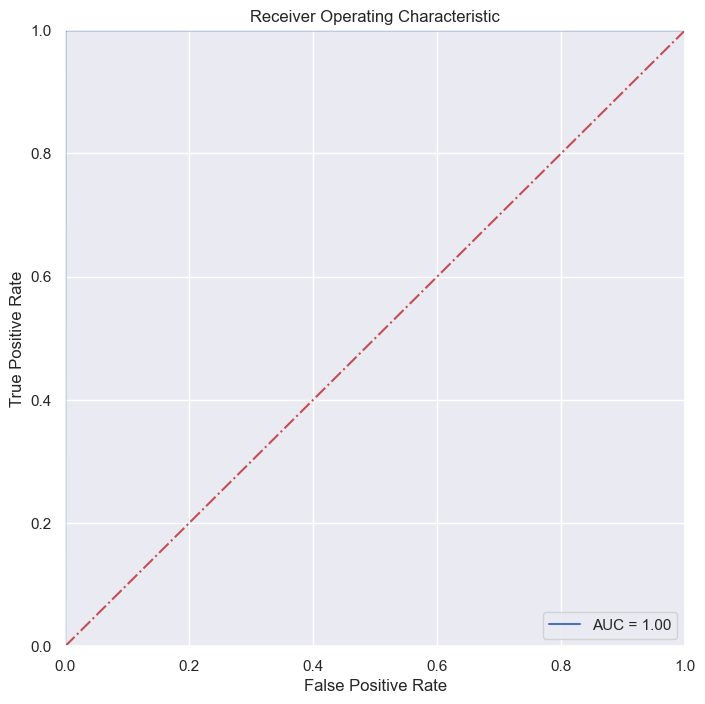

In [81]:
from sklearn.metrics import roc_curve, auc

y_prob = rfc.predict_proba(X_test)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r-.')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

\- ROC curve plot shows a perfect classifier with an AUC of 1.00, indicating that the model has an excellent ability to distinguish between the positive and negative classes without any errors.
______

### Future Considerations

**Model Monitoring**:
Continuously monitor the model's performance to detect and address any degradation or data drift.
___________
**Feature Re-evaluation**: 
Periodically reassess feature importance, and consider removing or adding features based on changing relevance.
________
**Stay Updated**:
Regularly explore advancements in machine learning to refine and improve the model.
_________

 <div style="color: #7B3EC6; font-weight: bold; font-size: 18px; white-space: nowrap;">
Conclusion
 </div>

\- The primary aim of our project was to identify the factors influencing claim frequency and severity over a six-month period to help insurance companies better assess risk and determine suitable premiums for their policyholders.

\- After thorough analysis, the findings are as follows:

________
**Policy Tenure**

\- The duration for which a policyholder has held their policy stands out as the most influential factor. 

\- This could mean that policyholders with either very short or very long tenures might be more prone to claims, suggesting a necessity for insurance companies to pay particular attention to the length of policy tenure when assessing risk.

**Age of the Policyholder & Car**

\- Older vehicles might be more susceptible to damage or may not have the latest safety features, leading to higher claim frequencies. 

\- Concurrently, the age of the policyholder can be indicative of driving experience or health, affecting claim probability.

**Geographical Aspects**

\- Features like area_cluster and population_density showed moderate importance. 

\- This indicates that certain geographic locations or densely populated areas may have a higher predisposition to claims. 

\- Insurance companies might consider regional factors when formulating premiums, although these aren't as influential as individual attributes like policy tenure or age.
_____

\- In light of these findings, insurance companies aiming to optimize their risk assessment strategies should prioritize the policy tenure, age of the car, and the policyholder's age when calculating premiums. 

\- While geographical features can provide additional insights, they should be considered supplementary to the aforementioned primary determinants. 

\- This nuanced understanding of risk factors will enable insurance providers to create more accurate and fair premium structures, balancing company profitability with customer satisfaction.
____________

In [107]:
data_en.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,model,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,turning_radius,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,fuel_type_Diesel,fuel_type_Petrol,steering_type_Manual,steering_type_Power,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility,max_torque/rpm,max_power/rpm,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,volume_of_car
0,0.515874,0.05,0.644231,1,-0.905331,1,1,2,0,0,0,1,0,1,-1.398760,3,1,5,4.6,-0.953336,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.017143,0.006727,0,0,0,0,0,1,0,0,0,0,-1.389360
1,0.672619,0.02,0.375000,2,1.029482,1,1,2,0,0,0,1,0,1,-1.398760,3,1,5,4.6,-0.953336,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.017143,0.006727,0,0,0,0,0,1,0,0,0,0,-1.389360
2,0.841110,0.02,0.384615,3,-0.985667,1,1,2,0,0,0,1,0,1,-1.398760,3,1,5,4.6,-0.953336,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.017143,0.006727,0,0,0,0,0,1,0,0,0,0,-1.389360
3,0.900277,0.11,0.432692,4,0.556523,1,2,2,1,1,0,1,1,1,0.114323,4,0,5,4.8,-0.248289,1,0,0,1,1,1,1,1,1,1,1,1,2,0,0,1,0,0,0,0,1,0,0,0.025682,0.014750,0,1,0,0,0,0,0,0,0,0,0.220580
4,0.596403,0.11,0.634615,5,1.709342,2,3,2,0,0,0,0,1,1,-0.632785,3,0,5,5.0,-1.094346,0,0,0,0,0,1,1,1,0,1,1,1,2,0,0,1,0,0,0,0,0,0,0,0.021412,0.012193,0,0,0,0,0,0,0,0,0,0,-0.769161


In [108]:
dataset = data_en[['policy_tenure', 'age_of_car', 'age_of_policyholder', 'area_cluster', 'population_density', 'is_claim']]

dataset.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,is_claim
0,0.515874,0.05,0.644231,1,-0.905331,0
1,0.672619,0.02,0.375000,2,1.029482,0
2,0.841110,0.02,0.384615,3,-0.985667,0
3,0.900277,0.11,0.432692,4,0.556523,0
4,0.596403,0.11,0.634615,5,1.709342,0


In [84]:
## Pipeline

In [109]:
from sklearn.pipeline import Pipeline  
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

scaler = StandardScaler()

model = RandomForestClassifier(bootstrap = False, max_depth = None, 
                             max_features = 'sqrt', min_samples_leaf = 1, 
                             min_samples_split = 2, n_estimators = 50)

pipe = Pipeline([
    ('scaling', scaler),
    ('Random_Forest Classifier', model)
])

X = dataset.drop(columns = ['is_claim'])

y = dataset['is_claim']

X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()),
                ('Random_Forest Classifier',
                 RandomForestClassifier(bootstrap=False, n_estimators=50))])

In [110]:
# saving pipe object

import pickle
pickle.dump(pipe, open('pipe.pkl', 'wb'))

********************************************************************************************************************************